In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
np.random.seed(42)

In [17]:
x = 2 * np.random.rand(100,1) -1
y = 5*x**2 -.5*x + 2 + np.random.rand(100,1)

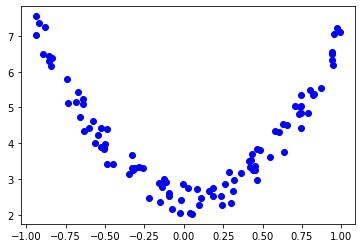

In [18]:
plt.plot(x,y, 'bo')

In [46]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dt_reg = DecisionTreeRegressor()#max_depth = 3)

In [47]:
dt_reg.fit(x,y)

DecisionTreeRegressor()

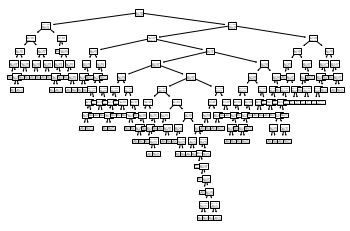

In [48]:
plot_tree(dt_reg)
plt.show()

In [49]:
x_test = np.linspace(-1,1,75).reshape(-1,1)

In [50]:
y_pred = dt_reg.predict(x_test)

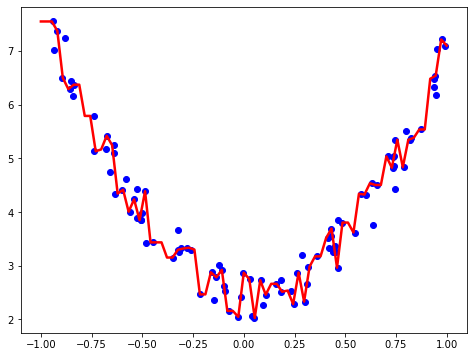

In [51]:
plt.figure(figsize=(8,6))
plt.plot(x,y, 'bo')
plt.plot(x_test,y_pred,'r-',lw =2.5)
plt.show()

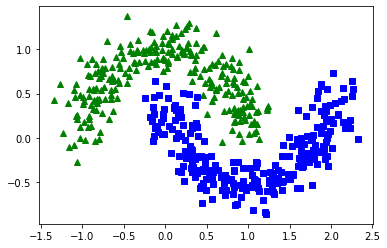

In [60]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples = 500, noise = 0.15, random_state= 42)
plt.plot(x[:,0][y==0], x[:,1][y==0],'g^')
plt.plot(x[:,0][y==1], x[:,1][y==1],'bs')
plt.show()

In [85]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [96]:
log_clf = LogisticRegression()
lin_svc = LinearSVC()
dt_clf = DecisionTreeClassifier(max_depth= 2)
rf_clf = RandomForestClassifier(max_depth= 2)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('linear_svc', lin_svc),('decision_tree',dt_clf),('randon_clf', rf_clf)], voting = 'hard')

In [65]:
voting_clf.fit(x,y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('linear_svc', LinearSVC()),
                             ('decision_tree',
                              DecisionTreeClassifier(max_depth=3)),
                             ('randon_clf',
                              RandomForestClassifier(max_depth=3))])

In [67]:
y_pred = voting_clf.predict(x)

In [91]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y,y_pred)

0.912

In [72]:
rf_clf.fit(x,y)
y_pred_rf = rf_clf.predict(x)

In [73]:
accuracy_score(y, rf_clf.predict(x))

0.922

In [75]:
log_clf.fit(x,y)
y_pred_log = log_clf.predict(x)
accuracy_score(y,y_pred_log)

0.86

In [94]:
def accuracy_score_(est):
    est.fit(x,y)
    y_pred_ = est.predict(x)
    score = accuracy_score(y,y_pred_)
    print(f'{est.__class__.__name__} accuracy =', score)

In [97]:
for i in (log_clf, lin_svc, dt_clf, rf_clf, voting_clf ):
    accuracy_score_(i)

LogisticRegression accuracy = 0.86
LinearSVC accuracy = 0.864
DecisionTreeClassifier accuracy = 0.924
RandomForestClassifier accuracy = 0.916
VotingClassifier accuracy = 0.904
